This is an outline of what the capstone project should look like. This can vary as per you choice of project, dataset or industry. 


# Data Analysis Project Guideline
    1. Identify a problem to solve

    Choose a real-world problem or a hypothetical one
    Clearly state the problem and the question you want to answer with your analysis
    
    2. Collect and clean data

    Collect data from various sources such as public data repositories or APIs 
    Clean and preprocess the data using the techniques you learned in the bootcamp such as handling missing values, removing duplicates, and converting data types.

    3. Perform exploratory data analysis

    Use descriptive statistics and visualization techniques to gain insights into the data
    Identify trends, patterns, and outliers in the data
    
    4. Apply statistical analysis (Optional)

    Apply statistical techniques to analyze the data and test your hypothesis
    Use techniques such as hypothesis testing, regression analysis, or clustering.
    
    5. Visualize the results

    Create compelling visualizations to communicate your findings
    Use various libraries such as Matplotlib, Seaborn, or Plotly to create visualizations.
    
    6. Draw conclusions

    Summarize your findings and draw conclusions based on your analysis
    Answer the question you posed at the beginning of the project and explain how your analysis supports your conclusion
    
    7. Document the process

    Document your entire data analysis process including the problem you addressed, data sources, data cleaning and preprocessing, exploratory analysis, statistical analysis, and visualizations
    This will help you showcase your skills to potential employers and colleagues.

    8. Share the project on GitHub

    Share your project on GitHub so that others can learn from your work
    This will also serve as a portfolio for you that you can use to showcase your skills to potential employers.

#Problem: (Any problem you can choose)
  1. Analyze the IMDB dataset to find out what factors contribute to the success of a movie.
  2. Analyze the IMDB datasets to answer general questions about the dataset


#Data Description:
The IMDB dataset contains information on various movies such as their title, genre, description, director, actors, year, runtime, rating, votes, revenue, and metascore.

#Objective:
Analyze the IMDB dataset to determine what factors are associated with a higher rating and revenue for a movie. Specifically, explore the following questions:

1. Revenue of all the movies over a period of time
2. What are the most popular genres among movie-goers?
3. Who are the most popular directors and actors?
4. Does the year of release have an impact on a movie's success?
5. What is the relationship between a movie's runtime and its success?
6. Is there a correlation between a movie's metascore and its success?
7. What other factors, if any, contribute to a movie's success?

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('IMDB-Movie-Data.csv')

# Data Cleaning


In [ ]:
df.isna().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

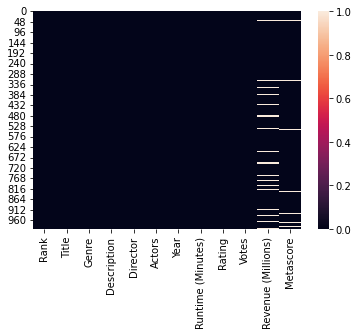

In [ ]:
sns.heatmap(df.isnull())
plt.show()

Now, there are different approaches to fill the data which is missing in revenue column. We can predict the missing values using linear regression models considering other features such as rating, genre, etc.

For this project, lets see if rating and revenue are positively correlated. If they are, we can rating to fill in approximate revenue

In [ ]:
df.corr()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,1.000000,-0.261605,-0.221739,-0.219555,-0.283876,-0.271592,-0.191869
Year,-0.261605,1.000000,-0.164900,-0.211219,-0.411904,-0.126790,-0.079305
Runtime (Minutes),-0.221739,-0.164900,1.000000,0.392214,0.407062,0.267953,0.211978
Rating,-0.219555,-0.211219,0.392214,1.000000,0.511537,0.217654,0.631897
Votes,-0.283876,-0.411904,0.407062,0.511537,1.000000,0.639661,0.325684
Revenue (Millions),-0.271592,-0.126790,0.267953,0.217654,0.639661,1.000000,0.142397
Metascore,-0.191869,-0.079305,0.211978,0.631897,0.325684,0.142397,1.000000


Based on the correlation matrix, we can see that ratings and revenue doesn't show a strong correlation and also since the missing data is not much as compared to all the rows in the dataframe, we can drop the rows. This is because, we don't want to skew the results with an approximate value which isn't reliable

In [ ]:
df.dropna(subset = ['Revenue (Millions)'],inplace = True)

For metascore we can use mean value of that column to fill missing values

In [ ]:
df['Metascore'].fillna(df['Metascore'].mean(), inplace = True)

In [ ]:
pd.options.display.max_columns = None
pd.options.display.max_rows = 50
#If you want to display all columns and 50 rows in the output execute this above code snippet

In [ ]:
#Lets look at the data type of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                872 non-null    int64  
 1   Title               872 non-null    object 
 2   Genre               872 non-null    object 
 3   Description         872 non-null    object 
 4   Director            872 non-null    object 
 5   Actors              872 non-null    object 
 6   Year                872 non-null    int64  
 7   Runtime (Minutes)   872 non-null    int64  
 8   Rating              872 non-null    float64
 9   Votes               872 non-null    int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           872 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 88.6+ KB


In [ ]:
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,838.000000,838.00000,838.000000,838.000000,8.380000e+02,838.000000,838.000000
mean,485.247017,2012.50716,114.638425,6.814320,1.932303e+05,84.564558,59.575179
std,286.572065,3.17236,18.470922,0.877754,1.930990e+05,104.520227,16.952416
min,1.000000,2006.00000,66.000000,1.900000,1.780000e+02,0.000000,11.000000
25%,238.250000,2010.00000,101.000000,6.300000,6.127650e+04,13.967500,47.000000
50%,475.500000,2013.00000,112.000000,6.900000,1.368795e+05,48.150000,60.000000
75%,729.750000,2015.00000,124.000000,7.500000,2.710830e+05,116.800000,72.000000
max,1000.000000,2016.00000,187.000000,9.000000,1.791916e+06,936.630000,100.000000


**revenue distribution by year**

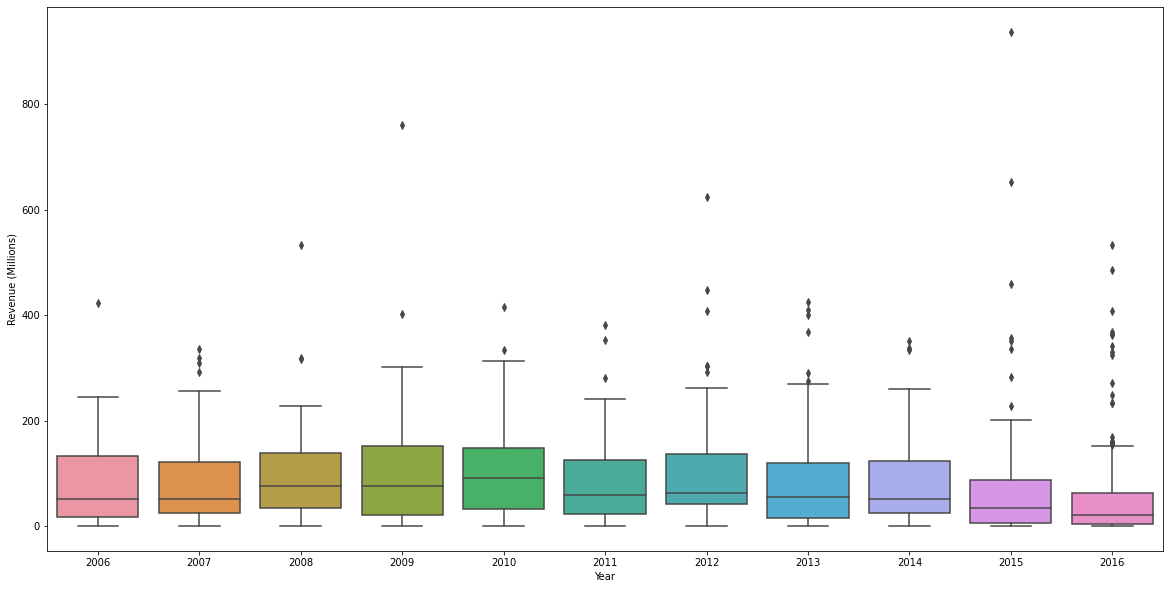

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (20,10))
sns.boxplot(data = df, x='Year',y = 'Revenue (Millions)', ax = ax)
plt.show()

From the boxplot, we can understand that Year 2009 followed by 2015 had highest grossing movie in terms of revenue

Most popular genres. This can be in terms of number of movies per genre or can also be in terms of revenue which is the most popular. Lets do both

In [ ]:
df['Genre']

#As we can see, the genre column as comma seperated values. Now in a dataframe, 
# if we use want to do a split operation to all the elements in a column of a dataframe we can do it like this: 


0       Action,Adventure,Sci-Fi
1      Adventure,Mystery,Sci-Fi
2               Horror,Thriller
3       Animation,Comedy,Family
4      Action,Adventure,Fantasy
                 ...           
993     Action,Adventure,Horror
994                      Comedy
996                      Horror
997         Drama,Music,Romance
999       Comedy,Family,Fantasy
Name: Genre, Length: 872, dtype: object

In [ ]:
df['Genre'].str.split??

In [ ]:
df['Genre'].str.split(',',3,expand = True)
#The expand argument will make sure there are 3 as mentioned by 3 in the arguments and add NuLL values if 
# we don't have enough values to split

,0,1,2
0,Action,Adventure,Sci-Fi
1,Adventure,Mystery,Sci-Fi
2,Horror,Thriller,None
3,Animation,Comedy,Family
4,Action,Adventure,Fantasy
...,...,...,...
993,Action,Adventure,Horror
994,Comedy,None,None
996,Horror,None,None
997,Drama,Music,Romance


In [ ]:
df[['Genre1', 'Genre2','Genre3']] = df['Genre'].str.split(',', expand=True).fillna(value="")


In [ ]:
df[['Genre1', 'Genre2','Genre3']]

,Genre1,Genre2,Genre3
0,Action,Adventure,Sci-Fi
1,Adventure,Mystery,Sci-Fi
2,Horror,Thriller,
3,Animation,Comedy,Family
4,Action,Adventure,Fantasy
...,...,...,...
993,Action,Adventure,Horror
994,Comedy,,
996,Horror,,
997,Drama,Music,Romance


In [ ]:
g1 = df.groupby('Genre1').sum() 
g2 = df.groupby('Genre2').sum() 
g3 = df.groupby('Genre3').sum() 

In [ ]:
temp = g1.add(g2,fill_value = 0)
final = temp.add(g3,fill_value = 0)

In [ ]:
final_df = final.sort_values(by = 'Revenue (Millions)',ascending = False)

In [ ]:
final_df

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Adventure,106542.0,507138.0,29794.0,1714.6,66673934.0,38852.61,14588.601432
Action,123146.0,575571.0,33600.0,1904.8,70357158.0,35605.42,15507.176611
Drama,222019.0,885552.0,52067.0,3097.0,72758560.0,21931.45,28309.078759
Comedy,133337.0,513253.0,27195.0,1708.7,39006151.0,19316.45,14867.875895
,179450.0,680307.0,37544.0,2260.1,49811096.0,17717.19,20061.052506
Sci-Fi,45315.0,221344.0,12922.0,744.0,34473598.0,14910.78,6425.725537
Fantasy,44325.0,187088.0,11011.0,615.2,21424651.0,12262.06,5126.575179
Thriller,77313.0,307882.0,17491.0,1036.2,30153881.0,10645.32,9138.875895
Animation,22728.0,94592.0,4591.0,343.7,10192662.0,8987.50,3295.150358
Crime,62032.0,261593.0,15249.0,897.5,26123301.0,8034.62,7649.300716


In [ ]:
#validate your computations to see if you are getting same results
df[df['Genre'].str.contains('Adventure')]['Revenue (Millions)'].sum()

38852.61

we can clearly see, in terms of revenue we have Adventure as clear winner followed by Action. It would be interesting to see if the number of movies made in these genre are also in the same descending order

In [ ]:
g1 = df['Genre1'].value_counts() 
g2 = df['Genre2'].value_counts() 
g3 = df['Genre3'].value_counts() 
temp_count = g1.add(g2,fill_value=0)
final_count = temp_count.add(g3,fill_value = 0)

In [ ]:
final_count = final_count.iloc[1:].sort_values(ascending = False)

In [ ]:
final_count.name = 'Num of movies'

In [ ]:
final_df = final_df.merge(final_count, left_index = True,right_index = True)

In [ ]:
final_df

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Num of movies
Adventure,106542.0,507138.0,29794.0,1714.6,66673934.0,38852.61,14588.601432,252.0
Action,123146.0,575571.0,33600.0,1904.8,70357158.0,35605.42,15507.176611,286.0
Drama,222019.0,885552.0,52067.0,3097.0,72758560.0,21931.45,28309.078759,440.0
Comedy,133337.0,513253.0,27195.0,1708.7,39006151.0,19316.45,14867.875895,255.0
Sci-Fi,45315.0,221344.0,12922.0,744.0,34473598.0,14910.78,6425.725537,110.0
Fantasy,44325.0,187088.0,11011.0,615.2,21424651.0,12262.06,5126.575179,93.0
Thriller,77313.0,307882.0,17491.0,1036.2,30153881.0,10645.32,9138.875895,153.0
Animation,22728.0,94592.0,4591.0,343.7,10192662.0,8987.50,3295.150358,47.0
Crime,62032.0,261593.0,15249.0,897.5,26123301.0,8034.62,7649.300716,130.0
Family,26787.0,98594.0,5464.0,328.6,7192538.0,6182.61,2759.575179,49.0


In [ ]:
#Always validate your computations like this
df['Genre'].str.contains('Action').sum()

286

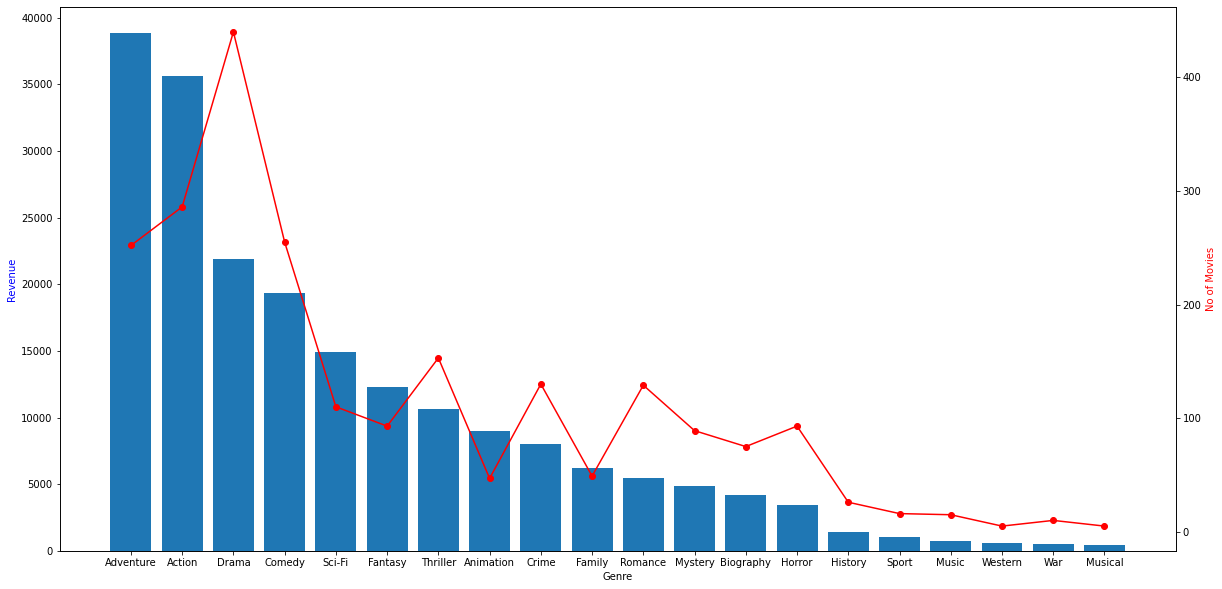

In [ ]:
fig, ax1 = plt.subplots(figsize = (20,10))
ax2 = ax1.twinx()
ax1.bar(final_df.index,final_df['Revenue (Millions)'])
ax2.plot(final_df.index,final_df['Num of movies'], 'o-', color="red" )
ax1.set_xlabel('Genre')
ax1.set_ylabel('Revenue', color='b')
ax2.set_ylabel('No of Movies', color='r')
plt.show()


Now we have various runtime for different movies. Some movies are very short and some are very long. Lets see how these outlier runtime movies perform in terms of revenue

In [ ]:
#Which movies are outliers in terms of runtime and did they perform well?
df.describe()

q1 = 101
q3 = 124
IQR = q3-q1


,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,872.000000,872.000000,872.000000,872.000000,8.720000e+02,872.000000,872.000000
mean,492.735092,2012.478211,114.783257,6.814335,1.909701e+05,82.956376,59.575179
std,288.134843,3.183552,18.633144,0.881674,1.921325e+05,103.253540,16.618249
min,1.000000,2006.000000,66.000000,1.900000,1.780000e+02,0.000000,11.000000
25%,243.750000,2010.000000,101.000000,6.300000,6.062750e+04,13.270000,48.000000
50%,488.500000,2013.000000,112.000000,6.900000,1.346540e+05,47.985000,59.575179
75%,739.250000,2015.000000,125.000000,7.500000,2.678330e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


## Very short duration movies


In [ ]:
q1 = 101
q3 = 124
IQR = q3-q1

df.loc[(df['Runtime (Minutes)']<=q1-1.5*IQR)]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Genre1,Genre2,Genre3,Actor1,Actor2,Actor3
793,794,Ma vie de Courgette,"Animation,Comedy,Drama","After losing his mother, a young boy is sent t...",Claude Barras,"Gaspard Schlatter, Sixtine Murat, Paulin Jacco...",2016,66,7.8,4370,0.29,85.0,Animation,Comedy,Drama,Gaspard Schlatter,Sixtine Murat,"Paulin Jaccoud,Michel Vuillermoz"


##very long movies

In [ ]:
q1 = 101
q3 = 124
IQR = q3-q1
df.loc[(df['Runtime (Minutes)']>=q3+1.5*IQR)]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Genre1,Genre2,Genre3,Actor1,Actor2,Actor3
26,27,Bahubali: The Beginning,"Action,Adventure,Drama","In ancient India, an adventurous and daring ma...",S.S. Rajamouli,"Prabhas, Rana Daggubati, Anushka Shetty,Tamann...",2015,159,8.3,76193,6.50,59.575179,Action,Adventure,Drama,Prabhas,Rana Daggubati,"Anushka Shetty,Tamannaah Bhatia"
36,37,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.000000,Adventure,Drama,Sci-Fi,Matthew McConaughey,Anne Hathaway,"Jessica Chastain, Mackenzie Foy"
55,56,Silence,"Adventure,Drama,History","In the 17th century, two Portuguese Jesuit pri...",Martin Scorsese,"Andrew Garfield, Adam Driver, Liam Neeson,Tada...",2016,161,7.3,49190,7.08,79.000000,Adventure,Drama,History,Andrew Garfield,Adam Driver,"Liam Neeson,Tadanobu Asano"
75,76,Pirates of the Caribbean: At World's End,"Action,Adventure,Fantasy","Captain Barbossa, Will Turner and Elizabeth Sw...",Gore Verbinski,"Johnny Depp, Orlando Bloom, Keira Knightley,Ge...",2007,169,7.1,498821,309.40,50.000000,Action,Adventure,Fantasy,Johnny Depp,Orlando Bloom,"Keira Knightley,Geoffrey Rush"
82,83,The Wolf of Wall Street,"Biography,Comedy,Crime","Based on the true story of Jordan Belfort, fro...",Martin Scorsese,"Leonardo DiCaprio, Jonah Hill, Margot Robbie,M...",2013,180,8.2,865134,116.87,75.000000,Biography,Comedy,Crime,Leonardo DiCaprio,Jonah Hill,"Margot Robbie,Matthew McConaughey"
87,88,Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,760.51,83.000000,Action,Adventure,Fantasy,Sam Worthington,Zoe Saldana,"Sigourney Weaver, Michelle Rodriguez"
88,89,The Hateful Eight,"Crime,Drama,Mystery","In the dead of a Wyoming winter, a bounty hunt...",Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jaso...",2015,187,7.8,341170,54.12,68.000000,Crime,Drama,Mystery,Samuel L. Jackson,Kurt Russell,"Jennifer Jason Leigh, Walton Goggins"
117,118,Dangal,"Action,Biography,Drama",Former wrestler Mahavir Singh Phogat and his t...,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",2016,161,8.8,48969,11.15,59.575179,Action,Biography,Drama,Aamir Khan,Sakshi Tanwar,"Fatima Sana Shaikh,Sanya Malhotra"
124,125,The Dark Knight Rises,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.000000,Action,Thriller,,Christian Bale,Tom Hardy,"Anne Hathaway,Gary Oldman"
126,127,Transformers: Age of Extinction,"Action,Adventure,Sci-Fi",Autobots must escape sight from a bounty hunte...,Michael Bay,"Mark Wahlberg, Nicola Peltz, Jack Reynor, Stan...",2014,165,5.7,255483,245.43,32.000000,Action,Adventure,Sci-Fi,Mark Wahlberg,Nicola Peltz,"Jack Reynor, Stanley Tucci"


In [ ]:
df.loc[(df['Runtime (Minutes)']>=q3+1.5*IQR)]['Revenue (Millions)'].mean()

129.9732

## Non outlier movie average revenue

In [ ]:
df[(df['Runtime (Minutes)']>q1-1.5*IQR) & (df['Runtime (Minutes)']<q3+1.5*IQR) ]['Revenue (Millions)'].mean()

81.66470449172576

As we can see, the movies which are longer tend to do good in terms of numbers as opposed to normal runtime movies.

In [ ]:
#Highest rated directors 

df.groupby('Director')['Rating'].mean().sort_values(ascending = False).iloc[:20]

Director
Nitesh Tiwari                       8.800000
Christopher Nolan                   8.680000
Olivier Nakache                     8.600000
Makoto Shinkai                      8.600000
Aamir Khan                          8.500000
Florian Henckel von Donnersmarck    8.500000
Damien Chazelle                     8.400000
Lee Unkrich                         8.300000
Rajkumar Hirani                     8.300000
Thomas Vinterberg                   8.300000
S.S. Rajamouli                      8.300000
Pete Docter                         8.250000
Juan José Campanella                8.200000
Lenny Abrahamson                    8.200000
Quentin Tarantino                   8.166667
Chan-wook Park                      8.100000
Sean Penn                           8.100000
Byron Howard                        8.100000
Damián Szifron                      8.100000
Tom McCarthy                        8.100000
Name: Rating, dtype: float64

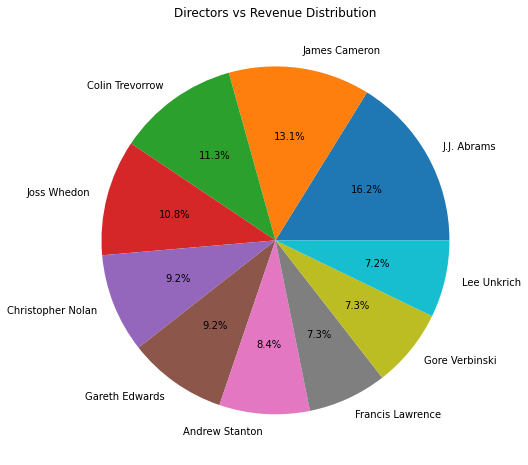

In [ ]:
#Directors with highest revenue
# Get the top 10 movies by revenue and group by director
top_directors = df.sort_values(by='Revenue (Millions)', ascending=False).groupby('Director').head(1).nlargest(10, 'Revenue (Millions)')

# Create a pie chart showing revenue distribution by director
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(top_directors['Revenue (Millions)'], labels=top_directors['Director'], autopct='%1.1f%%')
ax.set_title('Directors vs Revenue Distribution')

plt.show()


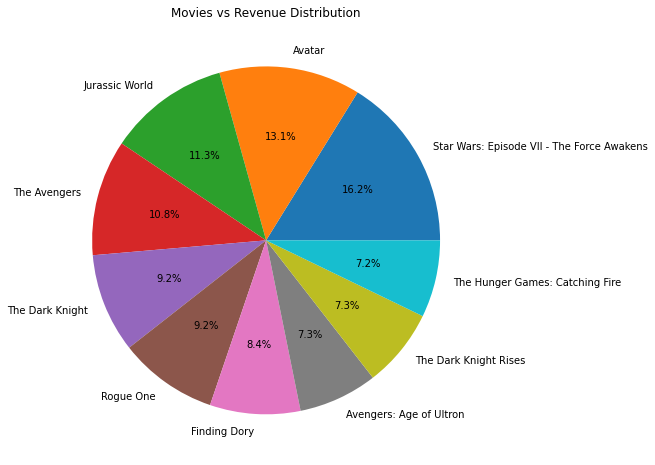

In [ ]:
# Movies with highest revenue
top_movies = df.sort_values(by='Revenue (Millions)', ascending=False).groupby('Title').head(1).nlargest(10, 'Revenue (Millions)')

# Create a pie chart showing revenue distribution by director
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(top_directors['Revenue (Millions)'], labels=top_movies['Title'], autopct='%1.1f%%')
ax.set_title('Movies vs Revenue Distribution')

plt.show()


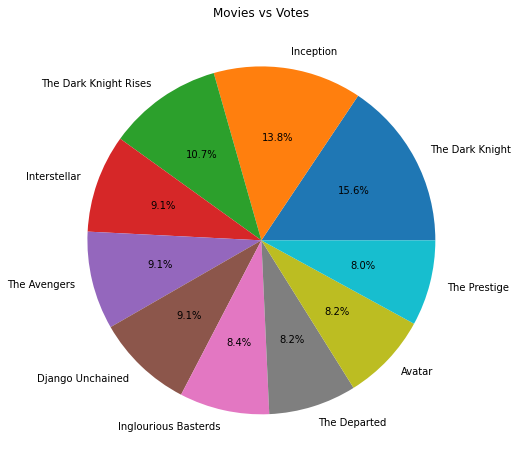

In [ ]:
# Movies with highest vote
top_vote = df.sort_values(by='Votes', ascending=False).groupby('Title').head(1).nlargest(10, 'Votes')

# Create a pie chart showing revenue distribution by director
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(top_vote['Votes'], labels=top_vote['Title'], autopct='%1.1f%%')
ax.set_title('Movies vs Votes')

plt.show()


In [ ]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore', 'Genre1', 'Genre2', 'Genre3'],
      dtype='object')

Now this part of actors is a bit tricky but its fun after you learn how to deal with this column. You have a column containing actors name. Now, you want to know which actor sum of movie revenue of the movies in which the actor was a part of. This would give you the most valuable movie actor. 

We know that if we split the string we get an array of substrings as an output. What happens if you split a pandas series containing string? it generates a dataframe as an output when you set argument, expand = True. When you do that, you will have a dataframe with columns each containing the actors. Make another column revenues which is the same as original dataframe column. Now, you will have dataframe containing say 4-5 columns each containing actor names and last column of revenues. Now you can use pd.melt to melt down the data frame to convert to one actor column and one revenue column. Sort the dataframe in descending order of revenue.   

In [ ]:
import pandas as pd

# create a DataFrame with example data

# create a new DataFrame by splitting the Actors column
actors_df = df['Actors'].str.split(',', expand=True)

# add the Revenue column to the actors DataFrame
actors_df['Revenue (Millions)'] = df['Revenue (Millions)']

# melt the actors DataFrame to long format
melted_df = pd.melt(actors_df, id_vars='Revenue (Millions)', value_vars=[0, 1, 2],
                    var_name='Actor_Num', value_name='Actor')

# group the melted DataFrame by Actor and sum the Revenue
grouped_df = melted_df.groupby('Actor')['Revenue (Millions)'].sum()



<AxesSubplot:xlabel='Actor'>

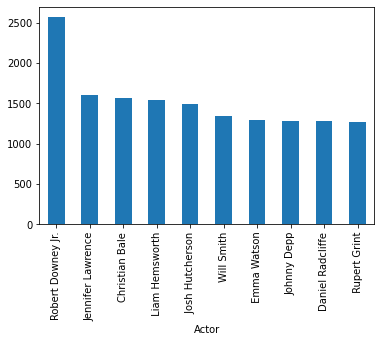

In [ ]:
grouped_df.sort_values(ascending = False)[:10].plot(kind = 'bar')

In [ ]:
#Highest rated director each year

ser1 = df.groupby(['Year','Director'])['Rating'].mean()

In [ ]:
ser1

Year  Director                   
2006  Adam McKay                     6.6
      Alejandro González Iñárritu    7.5
      Alexandre Aja                  6.4
      Alfonso Cuarón                 7.9
      Andy Fickman                   6.4
                                    ... 
2016  Whit Stillman                  6.5
      William Brent Bell             6.0
      Woody Allen                    6.7
      Yimou Zhang                    6.1
      Zack Snyder                    6.7
Name: Rating, Length: 863, dtype: float64

In [ ]:
pd.Series.sort_index??

In [ ]:
df[df['Director']=='Florian Henckel von Donnersmarck']

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Genre1,Genre2,Genre3
476,477,The Lives of Others,"Drama,Thriller","In 1984 East Berlin, an agent of the secret po...",Florian Henckel von Donnersmarck,"Ulrich Mühe, Martina Gedeck,Sebastian Koch, Ul...",2006,137,8.5,278103,11.28,89.0,Drama,Thriller,


In [ ]:
ser1.sort_values(ascending = False).sort_index(level = 0,sort_remaining = False).to_frame().reset_index()

,Year,Director,Rating
0,2006,Martin Scorsese,8.5
1,2006,Florian Henckel von Donnersmarck,8.5
2,2006,Christopher Nolan,8.5
3,2006,Guillermo del Toro,8.2
4,2006,Gabriele Muccino,8.0
...,...,...,...
858,2016,Farren Blackburn,4.6
859,2016,Stewart Hendler,4.6
860,2016,Joey Curtis,4.0
861,2016,George Nolfi,3.9


In [ ]:
df1 = ser1.sort_values(ascending = False).sort_index(level = 0,sort_remaining = False).to_frame().reset_index()


In [ ]:
df1

,Year,Director,Rating
0,2006,Martin Scorsese,8.5
1,2006,Florian Henckel von Donnersmarck,8.5
2,2006,Christopher Nolan,8.5
3,2006,Guillermo del Toro,8.2
4,2006,Gabriele Muccino,8.0
...,...,...,...
858,2016,Farren Blackburn,4.6
859,2016,Stewart Hendler,4.6
860,2016,Joey Curtis,4.0
861,2016,George Nolfi,3.9


idxmax() is a pandas method that returns the index of the maximum value in a pandas Series or DataFrame. If the Series or DataFrame contains multiple maximum values, idxmax() returns the index of the first occurrence of the maximum value.

In the context of the code I provided to find the highest rated director for each year, idxmax() is used twice. The first time it is used on the grouped DataFrame to find the maximum rating for each (Year, Director) group. The resulting Series has a MultiIndex with the Year and Director as the levels. The second time idxmax() is used, it is used on the resulting Series to find the index (i.e., (Year, Director) tuple) with the highest rating for each Year. This resulting Series has Year as the index and (Year, Director) tuples as the values.

Using values.tolist() on the resulting Series converts the tuples to a list of tuples, which is then used to print the highest rated director for each year.

In [ ]:
df1.loc[df1.groupby('Year')['Rating'].idxmax(),:]

,Year,Director,Rating
0,2006,Florian Henckel von Donnersmarck,8.5
41,2007,Aamir Khan,8.5
85,2008,Christopher Nolan,9.0
133,2009,Rajkumar Hirani,8.4
178,2010,Christopher Nolan,8.8
235,2011,Olivier Nakache,8.6
292,2012,Christopher Nolan,8.5
354,2013,Martin Scorsese,8.2
436,2014,Christopher Nolan,8.6
528,2015,Pete Docter,8.2


In [ ]:
# investigate the use of pd.cut and pd.qcut methods in this data analysis

# Conclusion